In [182]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz (37.4 MB)
^C
ERROR: Operation cancelled by user


In [37]:
from bookworm import *
import pandas as pd
import networkx as nx

import spacy
import nltk
import string
import en_core_web_md
book = load_book('utterance.txt', lower=False)
sequences = get_sentence_sequences(book)

In [48]:
remove_punctuation = lambda s: s.translate(str.maketrans('', '', string.punctuation+'’'))
words = [remove_punctuation(p) for p in book.split()]
uw = []
names = ['Michael', 'Roy', 'Jim', 'Dwight', 'Pam', 'Andy', 'Kevin', 'Angela', 'Oscar', 
         'Erin', 'Ryan']
unique_words = list(set(words))
for i in unique_words:
    if i in names:
        uw.append(i)

len(uw)


11

In [49]:
nlp = en_core_web_md.load()

candidates = [word.text for word in nlp(' '.join(uw))] 


In [50]:
candidates[:10]

['Erin',
 'Dwight',
 'Kevin',
 'Michael',
 'Pam',
 'Roy',
 'Jim',
 'Ryan',
 'Oscar',
 'Andy']

In [51]:
characters = [tuple([character + ' ']) for character in set(candidates)]

In [52]:
df = find_connections(sequences, characters)
cooccurence = calculate_cooccurence(df)

In [53]:
interaction_df = get_interaction_df(cooccurence, threshold=1)
interaction_df

,source,target,value
0,Angela,Jim,3
1,Angela,Kevin,4
2,Angela,Pam,6
3,Angela,Oscar,8
4,Angela,Dwight,16
5,Angela,Andy,8
6,Jim,Kevin,5
7,Jim,Michael,26
8,Jim,Pam,98
9,Jim,Roy,13


In [54]:
interaction_df.to_csv('final.csv', sep='\t', index=False)

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,9)

import pandas as pd
import numpy as np

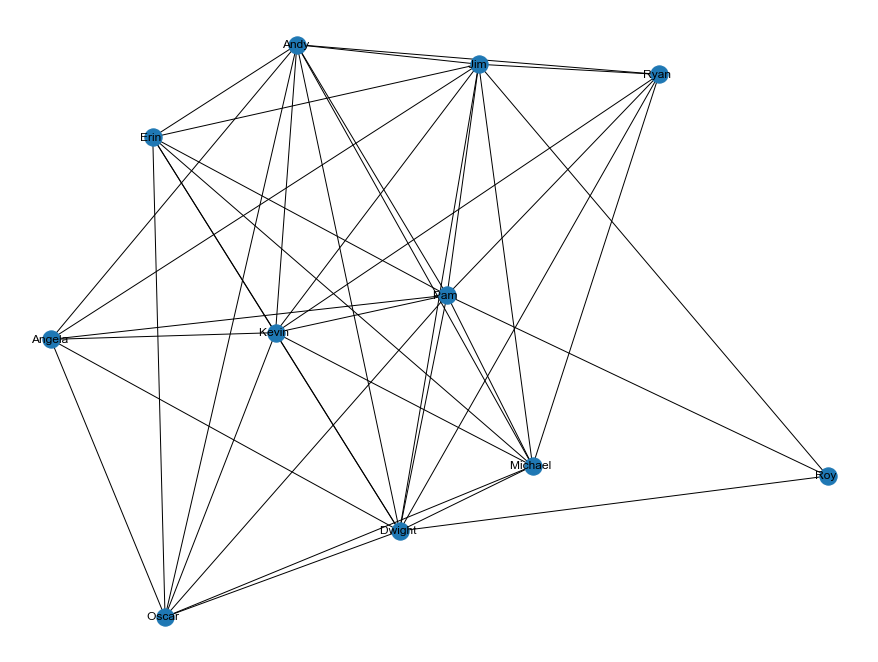

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,9)

G = nx.from_pandas_edgelist(interaction_df,
                             source='source',
                             target='target')

nx.draw(G, with_labels=True)